In [125]:
import sys
import os
workPath = os.path.abspath('..')
if not workPath in sys.path:
    sys.path.append(workPath)

In [126]:
import os
import numpy as np
import math

import matplotlib as mpl
import matplotlib.pyplot as plt

In [127]:
from everest.window import Fetch, Reader

In [128]:
outputPath = '../out'
frameName = 'Nuftest8'

In [129]:
myreader = Reader(os.path.join(outputPath, frameName) + '.frm')

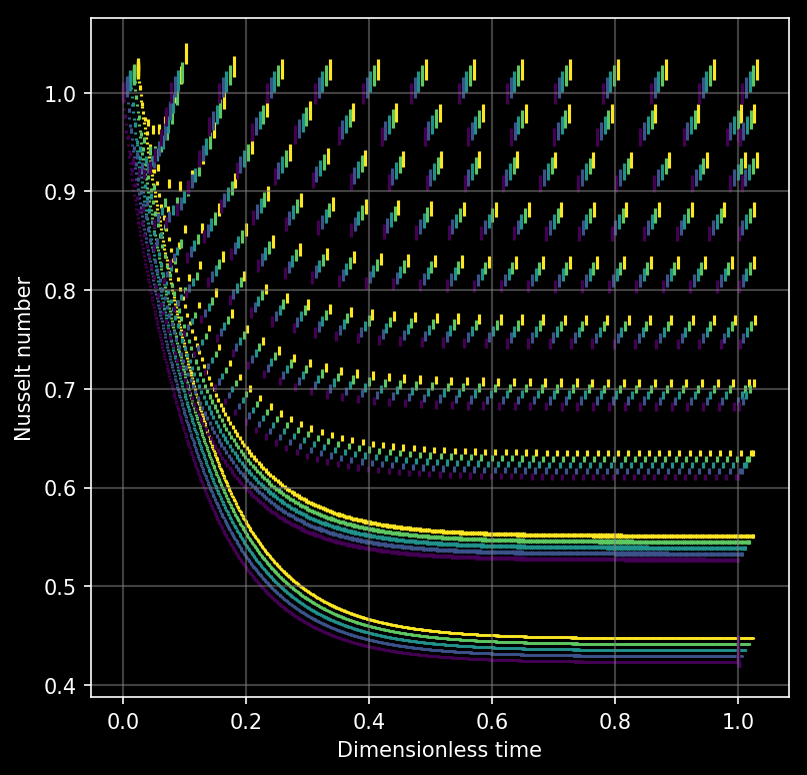

In [405]:
attrDict = myreader.view_attrs()
Ras = sorted(attrDict['Ra'].keys())
fs = sorted(attrDict['f'].keys())
ress = sorted(attrDict['res'].keys())

widthInches = 6
heightInches = 6

fig, ax = plt.subplots(
    figsize = (widthInches, heightInches), 
    dpi = 150,
    facecolor = 'black',
    edgecolor = 'black'
    )

mpl.rcParams.update({
    'text.color': "white",
    'axes.labelcolor': "white"
    })
ax.set_facecolor('black')
ax.grid(color = 'grey', linestyle = '-', linewidth = 1, alpha = 0.5)
ax.tick_params(color = 'white', labelcolor = 'white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.set_xlabel('Dimensionless time')
ax.set_ylabel('Nusselt number')
# ax.set_xlim((0., 1.2))
# ax.set_ylim((0., 1.05))

logRas = np.log(Ras)
cmap = plt.get_cmap('viridis')
norm = mpl.colors.Normalize(
    vmin = np.min(logRas),
    vmax = np.max(logRas)
    )

resOffsets = {
    8: 0,
    64: 1.
    }

for res in ress:
    resScope = attrDict['res'][res]
    for Ra in Ras[::-1]:
        RaScope = attrDict['Ra'][Ra]
        for f in fs:
            fScope = attrDict['f'][f]
            localScope = RaScope * fScope * resScope
            for scopelet in sorted(localScope):
                sysname = scopelet[0]
                observers = myreader[Fetch('system') == '_built_:' + sysname, Fetch('modeltime')]
                if len(observers):
                    modeltimes, Nus = myreader.pull(observers, ('modeltime', 'Nu'))
                    c = cmap(norm(math.log(Ra)))
                    scatter = ax.scatter(
                        modeltimes.flatten() + math.log10(Ra) / 1e2 + resOffsets[res],
                        Nus.flatten() + math.log10(Ra) / 1e2,
                        c = [c for Nu in Nus],
                        s = 1e2 * f ** 2,
                        marker = '|',
                        alpha = 1.
                        )

In [390]:
ress = sorted(attrDict['res'].keys())
ress

[8, 64]

In [399]:
attrDict = myreader.view_attrs()
Ras = sorted(attrDict['Ra'].keys())
fs = sorted(attrDict['f'].keys())
ress = sorted(attrDict['res'].keys())

data = []
for res in ress:
    resScope = attrDict['res'][res]
    for Ra in Ras:
        RaScope = attrDict['Ra'][Ra]
        for f in fs:
            fScope = attrDict['f'][f]
            localScope = RaScope * fScope * resScope
            for scopelet in sorted(localScope):
                sysname = scopelet[0]
                observers = myreader[Fetch('system') == '_built_:' + sysname, Fetch('modeltime')]
                if len(observers):
                    modeltimes, Nus = myreader.pull(observers, ('modeltime', 'Nu'))
                    NuAv = np.average(Nus[-3])
                    data.append((res, Ra, f, NuAv))
data = np.array(data)

In [400]:
data.T

array([[8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 6.40000000e+01, 6.40000000e+01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000

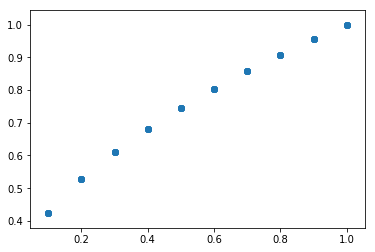

In [330]:
plt.scatter(data.T[1], data.T[2])

In [331]:
logfs = np.log(data.T[1])
logNus = np.log(data.T[2])

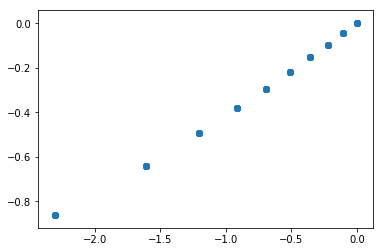

In [332]:
plt.scatter(logfs, logNus)

In [333]:
import numpy.polynomial.polynomial as poly

In [334]:
coefs = poly.polyfit(logfs, logNus, 1)

In [335]:
coefs

array([-0.01897162,  0.37826884])

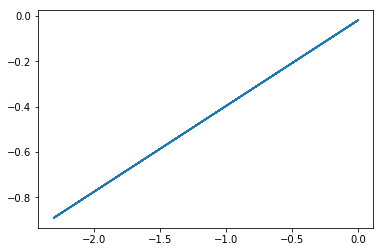

In [336]:
ffit = poly.Polynomial(coefs)    # instead of np.poly1d
plt.plot(logfs, ffit(logfs))

In [228]:
math.e ** -0.575

0.5627048688069557

In [229]:
7 / 30

0.23333333333333334

In [230]:
10 ** 0.2

1.5848931924611136

In [371]:
len(mything)

337